In [3]:
import numpy as np
import matplotlib.pyplot as plt

# format plot styles and numbers
plt.style.use('ggplot')
np.set_printoptions(precision=2, threshold=10)

In [4]:
data = np.genfromtxt('F:\data\house_price.txt', delimiter=',')
print(data)

[[2104. 3999.]
 [1600. 3299.]
 [2400. 3690.]
 ...
 [ 852. 1799.]
 [1852. 2999.]
 [1203. 2395.]]


In [5]:
X=data[:,0]
y=data[:,1]

In [6]:
for xi,yi in zip(X,y):
    print("({:6.1f}, {})".format(xi, yi))

(2104.0, 3999.0)
(1600.0, 3299.0)
(2400.0, 3690.0)
(1416.0, 2320.0)
(1985.0, 2999.0)
(1534.0, 3149.0)
(1427.0, 1989.0)
(1380.0, 2120.0)
(1494.0, 2425.0)
(1940.0, 2399.0)
(2000.0, 3470.0)
(1890.0, 3299.0)
(1268.0, 2599.0)
(2300.0, 4499.0)
(1320.0, 2999.0)
(1236.0, 1999.0)
(2609.0, 4999.0)
(1767.0, 2529.0)
(1888.0, 2550.0)
(1604.0, 2429.0)
(1962.0, 2599.0)
(1100.0, 2499.0)
(1458.0, 4645.0)
(2526.0, 4690.0)
(2200.0, 4750.0)
(2637.0, 2999.0)
(1839.0, 3499.0)
(1000.0, 1699.0)
(2040.0, 3149.0)
(1811.0, 2859.0)
(1437.0, 2499.0)
(1239.0, 2299.0)
(2132.0, 3450.0)
(2162.0, 2870.0)
(1664.0, 3685.0)
(2238.0, 3299.0)
(2567.0, 3140.0)
(1200.0, 2990.0)
( 852.0, 1799.0)
(1852.0, 2999.0)
(1203.0, 2395.0)


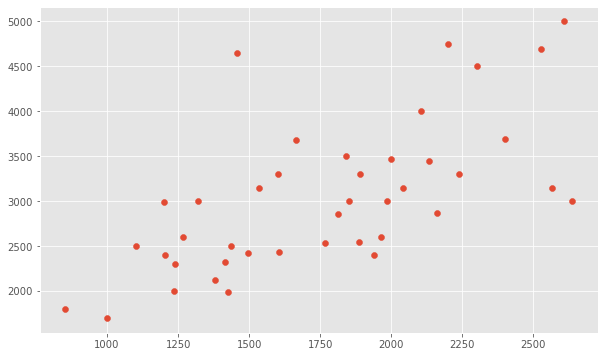

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.show()

In [34]:
theta = np.array([[500.], [1.5]])  # h(x) = 500 + 1.5 x


In [35]:

x = np.arange(500, 3000, 100)
print(x)

[ 500  600  700 ... 2700 2800 2900]


In [36]:
x = x[:, None]  # from 1d to 2d
print(x.shape)
x


(25, 1)


array([[ 500],
       [ 600],
       [ 700],
       ...,
       [2700],
       [2800],
       [2900]])

In [37]:

x = np.concatenate((np.ones_like(x), x), axis=1)  # horizontal concatination
print(x)

[[   1  500]
 [   1  600]
 [   1  700]
 ...
 [   1 2700]
 [   1 2800]
 [   1 2900]]


In [38]:
x.shape

(25, 2)

In [39]:
h=x@theta
h

array([[1250.],
       [1400.],
       [1550.],
       ...,
       [4550.],
       [4700.],
       [4850.]])

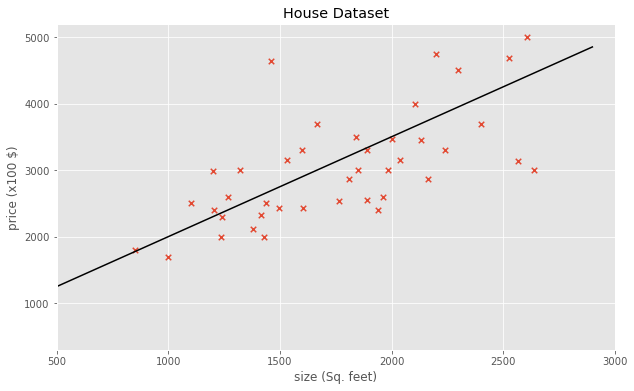

In [40]:

plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=30, marker='x')
plt.plot(x, h, 'k')
plt.xlabel('size (Sq. feet)')
plt.ylabel('price (x100 $)')
plt.title('Mehdis House Dataset')
plt.xlim(500, 3000)
plt.ylim(300, 5200)
plt.show()

In [63]:
from matplotlib import animation, rc
rc('animation', html='html5')

In [64]:
def h(theta_0, theta_1, x):
    return theta_0 + theta_1 * x

def mse(y_pred, y_true):
    return 0.5 * ((y_pred - y_true) ** 2).mean()

x, y = data[:, 0], data[:, 1]

In [65]:
mu = x.mean()
sigma = x.std()
xn = (x - mu) / sigma  # normalization
print(xn)
// mahdi was here 

[ 0.74 -0.35  1.38 ... -1.97  0.19 -1.21]


In [82]:
alpha = 0.5

# initialize parameters randomly
theta_0 = np.random.randn() 
theta_1 = np.random.randn()

print("Initial guess:")
print(" theta_0 = %.4f\n theta_1 = %.4f" %(theta_0, theta_1))

costs = []

def update_step():
    global theta_0, theta_1, costs
    
    # predict 
    y_pred = h(theta_0, theta_1, xn)
    costs.append(mse(y_pred, y))
    
    # compute gradients
    dtheta_0 = (y_pred - y)
    dtheta_1 = xn * dtheta_0
    
    # update parameters
    theta_0 -= alpha * dtheta_0.mean()
    theta_1 -= alpha * dtheta_1.mean()

Initial guess:
 theta_0 = 0.5909
 theta_1 = 0.2115


In [67]:

fig = plt.figure(dpi=100, figsize=(5, 3))

# plot data
plt.scatter(xn, y, s=30, marker='x')

# plot prediction (a line)
y_pred = h(theta_0, theta_1, xn)
line, = plt.plot(xn, y_pred, 'k')
plt.close()

def animate(i):
    line.set_ydata(h(theta_0, theta_1, xn))
    for i in range(100): update_step()
    return line,

anim = animation.FuncAnimation(fig, animate, np.arange(0, 20), interval=200, repeat_delay=1000)

In [68]:
anim

RuntimeError: Requested MovieWriter (ffmpeg) not available

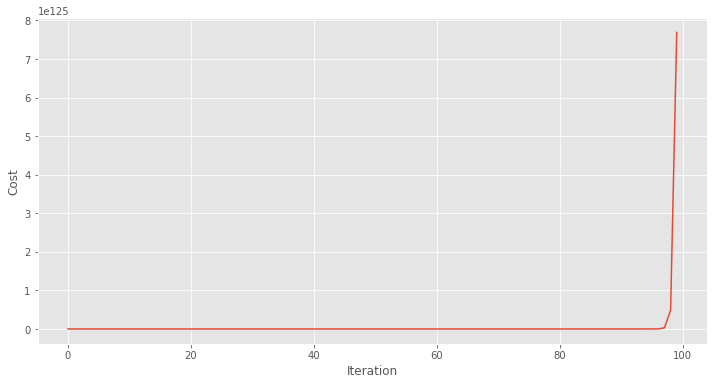

In [81]:
for i in range(100): update_step()
plt.figure(figsize=(12, 6))
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()